# Introduction to De-noising Diffusion Probabilistic Models

In [1]:
# !rm -rf diffusion
# !git clone https://github.com/bd3dowling/diffusion
# %cd diffusion
# %pip install . -q

In [2]:
import jax.numpy as jnp
import jax.random as random
import matplotlib.pyplot as plt
import optax
import seaborn as sns
from diffusion.backwards import (
    FullyConnectedWithTime,
    fit,
)
from diffusion.forwards import (
    forward_noising,
    get_alpha_beta,
)
from diffusion.sampling import sample_with_time
from diffusion.utils import plot_heatmap, sample_sphere

rng = random.PRNGKey(2022)

sns.set_style("darkgrid")

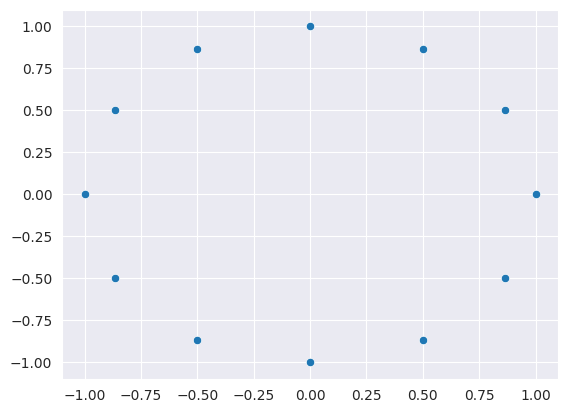

In [3]:
train_sample = sample_sphere(12)
sns.scatterplot(x=train_sample[:, 0], y=train_sample[:, 1])
plt.show()

In [4]:
n = 200
alpha, beta = get_alpha_beta(n)
alpha_bar = jnp.cumprod(alpha)

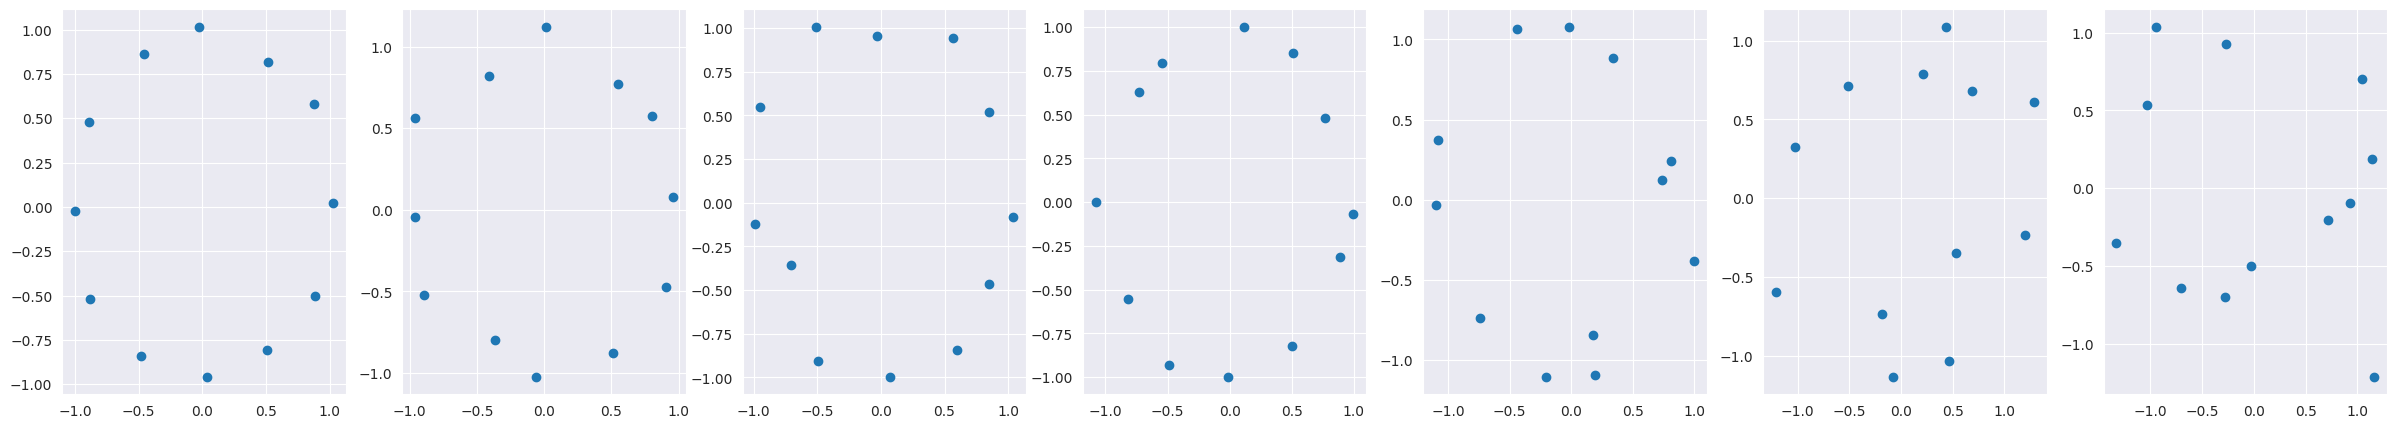

In [5]:
noisy_images, _ = forward_noising(train_sample, n, alpha)

fig = plt.figure(figsize=(30, 5))

for i, t in enumerate([1, 5, 10, 20, 50, 100, 199]):
    noisy_im = noisy_images[t]

    plt.subplot(1, 7, i + 1)
    plt.scatter(noisy_im[:, 0], noisy_im[:, 1])

plt.show()

In [6]:
n_epochs = 60_000

denoiser_model = FullyConnectedWithTime(2, key=rng)
optimizer = optax.adamw(learning_rate=1e-3)

fitted_model = fit(denoiser_model, n_epochs, optimizer, train_sample, alpha_bar, rng)


step=0,	 avg_train_loss=0.9133827686309814
step=5000,	 avg_train_loss=0.20066797733306885
step=10000,	 avg_train_loss=0.19275450706481934
step=15000,	 avg_train_loss=0.18874314427375793
step=20000,	 avg_train_loss=0.18539530038833618
step=25000,	 avg_train_loss=0.18353229761123657
step=30000,	 avg_train_loss=0.18206049501895905
step=35000,	 avg_train_loss=0.18101152777671814
step=40000,	 avg_train_loss=0.1800321787595749
step=45000,	 avg_train_loss=0.17903882265090942
step=50000,	 avg_train_loss=0.17840445041656494
step=55000,	 avg_train_loss=0.1780741810798645
step=59999,	 avg_train_loss=0.17740866541862488


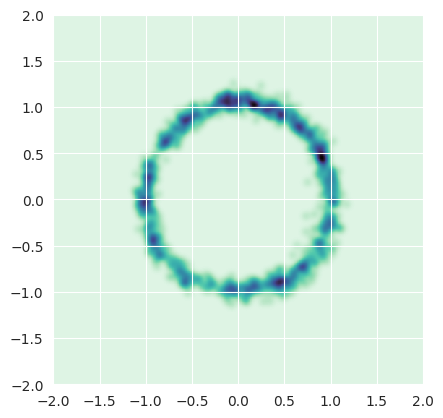

In [10]:
n_samples = 1_000
samples, all_outputs = sample_with_time(
    rng, n_samples, fitted_model, alpha_bar, beta
)
im = plot_heatmap(samples)


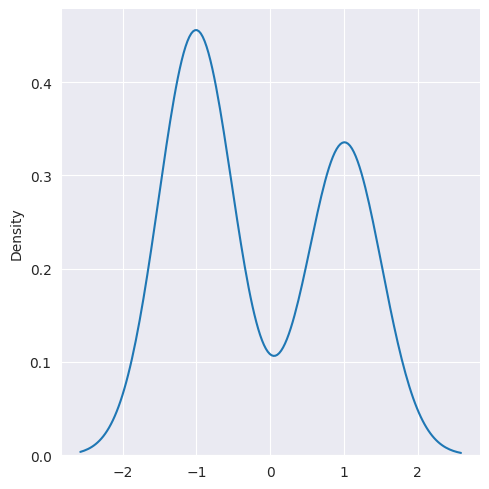

In [12]:
sns.displot(
    samples[jnp.where(round(samples[:, 1], ndigits = 1) == 0)][:, 0],
    kind='kde'
)
plt.show()